In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from collections import Counter

# 第一題

In [3]:
text = cv2.imread('text-broken.tif',cv2.IMREAD_GRAYSCALE)

In [4]:
kernel = np.ones((3,3))

In [5]:
dilation = cv2.dilate(text, kernel, iterations = 1)

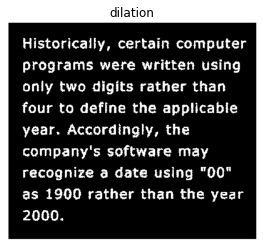

In [6]:
plt.title('dilation')
plt.axis('off')
plt.imshow(dilation,cmap = 'gray')
plt.savefig('1a.png')

In [7]:
erosion = cv2.erode(text, kernel, iterations = 1)

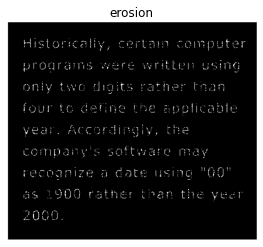

In [8]:
plt.title('erosion')
plt.axis('off')
plt.imshow(erosion,cmap = 'gray')

In [9]:
boundary = text - erosion

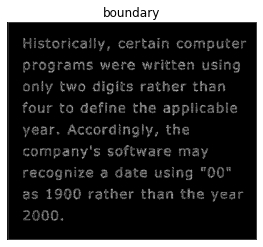

In [10]:
plt.title('boundary')
plt.axis('off')
plt.imshow(boundary, cmap = 'gray')
plt.savefig('1b.png')

# 第二題

In [11]:
view = cv2.imread('aerialview-washedout.tif', cv2.IMREAD_GRAYSCALE)

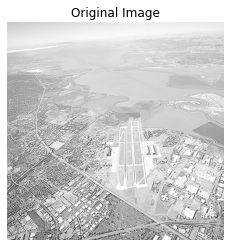

In [12]:
plt.title('Original Image')
plt.imshow(view,'gray')
plt.axis('off')
plt.savefig('original.png')

In [13]:
def linear_stretching(img):
    pixel_max = img.max()
    pixel_min = img.min()
    transform = (img - pixel_min)/(pixel_max - pixel_min) * 255
    return transform.astype('int')

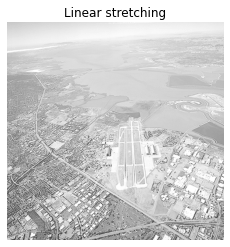

In [14]:
linear_stretch = linear_stretching(view)
plt.title('Linear stretching')
plt.axis('off')
plt.imshow(linear_stretch,'gray')
plt.savefig('linear_stretching.png')

# 第三題

In [15]:
def gamma_stretching(img, gamma):
    pixel_max = img.max()
    pixel_min = img.min()
    transform = ((img - pixel_min)/(pixel_max - pixel_min))**gamma *255
    return transform.astype('int')

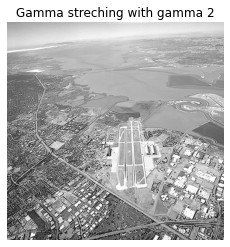

In [16]:
gamma_2 = gamma_stretching(view, 2)
plt.title('Gamma streching with gamma 2')
plt.axis('off')
plt.imshow(gamma_2, 'gray')
plt.savefig('gamma_2.png')

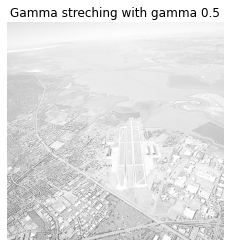

In [17]:
gamma_1 = gamma_stretching(view, 0.5)
plt.title('Gamma streching with gamma 0.5')
plt.axis('off')
plt.imshow(gamma_1, 'gray')
plt.savefig('gamma_1.png')

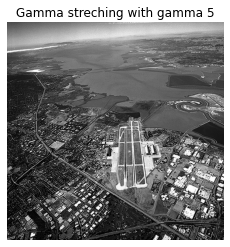

In [18]:
gamma_5 = gamma_stretching(view, 5)
plt.title('Gamma streching with gamma 5')
plt.axis('off')
plt.imshow(gamma_5, 'gray')
plt.savefig('gamma_5.png')

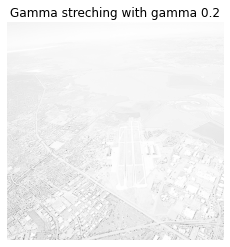

In [19]:
gamma_02 = gamma_stretching(view, 0.2)
plt.title('Gamma streching with gamma 0.2')
plt.axis('off')
plt.imshow(gamma_02, 'gray')
plt.savefig('gamma_02.png')

# 第四題

In [20]:
einstein = cv2.imread('einstein-low-contrast.tif', cv2.IMREAD_GRAYSCALE)

(-0.5, 489.5, 599.5, -0.5)

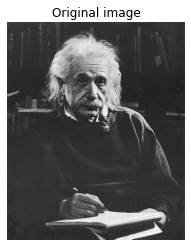

In [21]:
plt.imshow(einstein,'gray')
plt.title('Original image')
plt.axis('off')

In [22]:
mu = int(np.mean(einstein))

In [23]:
small = einstein[einstein <= mu]
big = einstein[einstein > mu]

In [24]:
small_dict = sorted(Counter(small).items())
cdf = np.array([i for _, i in small_dict]).cumsum()/sum([i for _, i in small_dict])
ceil = np.ceil(cdf *mu)
pixel_small = [j for j,_ in small_dict]
his = dict(zip(pixel_small,ceil))

In [25]:
big_dict = sorted(Counter(big).items())
cdf = np.array([i for _, i in big_dict]).cumsum()/sum([i for _, i in big_dict])
ceil = np.ceil(cdf *(255-mu-1)+mu+1)
pixel_big = [j for j,_ in big_dict]
his_big = dict(zip(pixel_big,ceil))

In [26]:
two_he = einstein.copy()
for i in range(einstein.shape[0]):
    for j in range(einstein.shape[1]):
        if einstein[i][j] > mu:
            two_he[i][j] = int(his_big[einstein[i][j]])
        else:
            two_he[i][j] = int(his[einstein[i][j]])

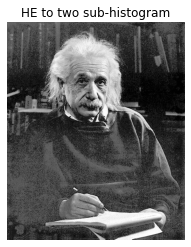

In [27]:
plt.axis('off')
plt.imshow(two_he,'gray')
plt.title('HE to two sub-histogram')
plt.savefig('two_he.png')